In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install optuna
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.3 MB/s eta 0:00:00


In [3]:
!pip install optuna.integration

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 2.9 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, average_precision_score, log_loss

In [6]:
store = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/assignment/store.csv')
store.T

,0,1,2,3,4,5,6,7,8,9,...,21730,21731,21732,21733,21734,21735,21736,21737,21738,21739
ZIP_CODE,1001,1028,1056,1118,1107,1106,1118,1106,1104,1104,...,58501,60013,62704,63025,63105,63105,72207,77084,78640,95605
FRE,2,4,2,8,1,2,1,1,1,12,...,7,65,2,3,1,2,6,9,3,5
MON,368.46,258.0,77.0,846.06,87.44,120.0,782.08,79.0,318.5,1663.46,...,591.24,1758.54,399.88,322.4,38.49,39.0,280.59,1274.96,265.94,555.42
CC_CARD,0,1,0,1,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,1
AVRG,184.23,64.5,38.5,105.75,87.44,60.0,782.08,79.0,318.5,138.62,...,84.46,27.05,199.94,107.46,38.49,19.5,46.76,141.66,88.64,111.08
PC_CALC20,11,11,11,11,11,11,11,11,11,11,...,11,16,16,11,11,11,11,16,11,11
PSWEATERS,0.18,0.26,1.0,0.38,0.2,0.0,0.12,0.0,0.24,0.25,...,0.37,0.25,0.07,0.17,1.0,0.0,0.02,0.29,0.18,0.21
PKNIT_TOPS,0.0,0.16,0.0,0.0,0.2,0.56,0.0,0.0,0.0,0.04,...,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.09
PKNIT_DRES,0.0,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.01,...,0.0,0.04,0.0,0.0,0.0,0.39,0.0,0.01,0.03,0.0
PBLOUSES,0.3,0.0,0.0,0.06,0.0,0.0,0.0,0.0,0.0,0.06,...,0.0,0.06,0.0,0.0,0.0,0.0,0.06,0.14,0.11,0.21


In [7]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21740 entries, 0 to 21739
Data columns (total 48 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ZIP_CODE      21740 non-null  int64  
 1   FRE           21740 non-null  int64  
 2   MON           21740 non-null  float64
 3   CC_CARD       21740 non-null  int64  
 4   AVRG          21740 non-null  float64
 5   PC_CALC20     21740 non-null  int64  
 6   PSWEATERS     21740 non-null  float64
 7   PKNIT_TOPS    21740 non-null  float64
 8   PKNIT_DRES    21740 non-null  float64
 9   PBLOUSES      21740 non-null  float64
 10  PJACKETS      21740 non-null  float64
 11  PCAR_PNTS     21740 non-null  float64
 12  PCAS_PNTS     21740 non-null  float64
 13  PSHIRTS       21740 non-null  float64
 14  PDRESSES      21740 non-null  float64
 15  PSUITS        21740 non-null  float64
 16  POUTERWEAR    21740 non-null  float64
 17  PJEWELRY      21740 non-null  float64
 18  PFASHION      21740 non-nu

In [8]:
store.isna().sum()

ZIP_CODE        0
FRE             0
MON             0
CC_CARD         0
AVRG            0
PC_CALC20       0
PSWEATERS       0
PKNIT_TOPS      0
PKNIT_DRES      0
PBLOUSES        0
PJACKETS        0
PCAR_PNTS       0
PCAS_PNTS       0
PSHIRTS         0
PDRESSES        0
PSUITS          0
POUTERWEAR      0
PJEWELRY        0
PFASHION        0
PLEGWEAR        0
PCOLLSPND       0
AMSPEND         0
PSSPEND         0
CCSPEND         0
AXSPEND         0
TMONSPEND       0
OMONSPEND       0
SMONSPEND       0
PREVPD          0
GMP             0
PROMOS          0
DAYS            0
FREDAYS         0
MARKDOWN        0
CLASSES         0
COUPONS         0
STYLES          0
STORES          0
VALPHON         0
WEB             0
MAILED          0
RESPONDED       0
RESPONSERATE    0
HI              0
LTFREDAY        0
CLUSTYPE        0
PERCRET         0
RESP            0
dtype: int64

#Loss function Define

In [9]:
tau = 1/(1+2)
print(f'Decision threshold: tau={round(tau,3)}')

Decision threshold: tau=0.333


#EDA

In [10]:
store = store.drop('ZIP_CODE',axis = 1)
#remove useless features

In [11]:
store = store.drop('CLUSTYPE',axis = 1)
store = store.drop('PERCRET',axis = 1)
#remove meaningless features

In [12]:
store['VALPHON'].replace({'Y': 1, 'N': 0}, inplace=True)
#change object to number

In [13]:
store.describe().T

,count,mean,std,min,25%,50%,75%,max
FRE,21740.0,5.064213,6.420276,1.00,1.0000,3.00,6.000000,115.00
MON,21740.0,472.888236,640.050799,0.99,135.6050,263.49,569.000000,22511.49
CC_CARD,21740.0,0.383763,0.486312,0.00,0.0000,0.00,1.000000,1.00
AVRG,21740.0,113.889105,87.249794,0.49,60.9900,92.07,139.505000,1919.88
PC_CALC20,21740.0,12.571803,2.461413,11.00,11.0000,11.00,16.000000,19.00
PSWEATERS,21740.0,0.213665,0.230224,0.00,0.0000,0.16,0.310000,1.00
PKNIT_TOPS,21740.0,0.027163,0.068648,0.00,0.0000,0.00,0.030000,1.00
PKNIT_DRES,21740.0,0.041295,0.109897,0.00,0.0000,0.00,0.030000,1.00
PBLOUSES,21740.0,0.093482,0.136428,0.00,0.0000,0.05,0.140000,1.00
PJACKETS,21740.0,0.135575,0.182822,0.00,0.0000,0.04,0.230000,1.00


In [14]:
feature_names = store.columns.tolist()
print(feature_names)

['FRE', 'MON', 'CC_CARD', 'AVRG', 'PC_CALC20', 'PSWEATERS', 'PKNIT_TOPS', 'PKNIT_DRES', 'PBLOUSES', 'PJACKETS', 'PCAR_PNTS', 'PCAS_PNTS', 'PSHIRTS', 'PDRESSES', 'PSUITS', 'POUTERWEAR', 'PJEWELRY', 'PFASHION', 'PLEGWEAR', 'PCOLLSPND', 'AMSPEND', 'PSSPEND', 'CCSPEND', 'AXSPEND', 'TMONSPEND', 'OMONSPEND', 'SMONSPEND', 'PREVPD', 'GMP', 'PROMOS', 'DAYS', 'FREDAYS', 'MARKDOWN', 'CLASSES', 'COUPONS', 'STYLES', 'STORES', 'VALPHON', 'WEB', 'MAILED', 'RESPONDED', 'RESPONSERATE', 'HI', 'LTFREDAY', 'RESP']


In [15]:
binary = ['CC_CARD', 'VALPHON', 'WEB']
numerical = ['FRE', 'MON', 'AVRG', 'PC_CALC20', 'PSWEATERS',
        'PKNIT_TOPS', 'PKNIT_DRES', 'PBLOUSES', 'PJACKETS', 'PCAR_PNTS',
        'PCAS_PNTS', 'PSHIRTS', 'PDRESSES', 'PSUITS', 'POUTERWEAR',
        'PJEWELRY', 'PFASHION', 'PLEGWEAR', 'PCOLLSPND', 'AMSPEND',
        'PSSPEND', 'CCSPEND', 'AXSPEND', 'TMONSPEND', 'OMONSPEND',
        'SMONSPEND', 'PREVPD', 'GMP', 'PROMOS', 'DAYS',
        'FREDAYS', 'MARKDOWN', 'CLASSES', 'COUPONS', 'STYLES',
        'STORES', 'MAILED', 'RESPONDED', 'RESPONSERATE', 'HI',
        'LTFREDAY']

In [16]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/assignment')

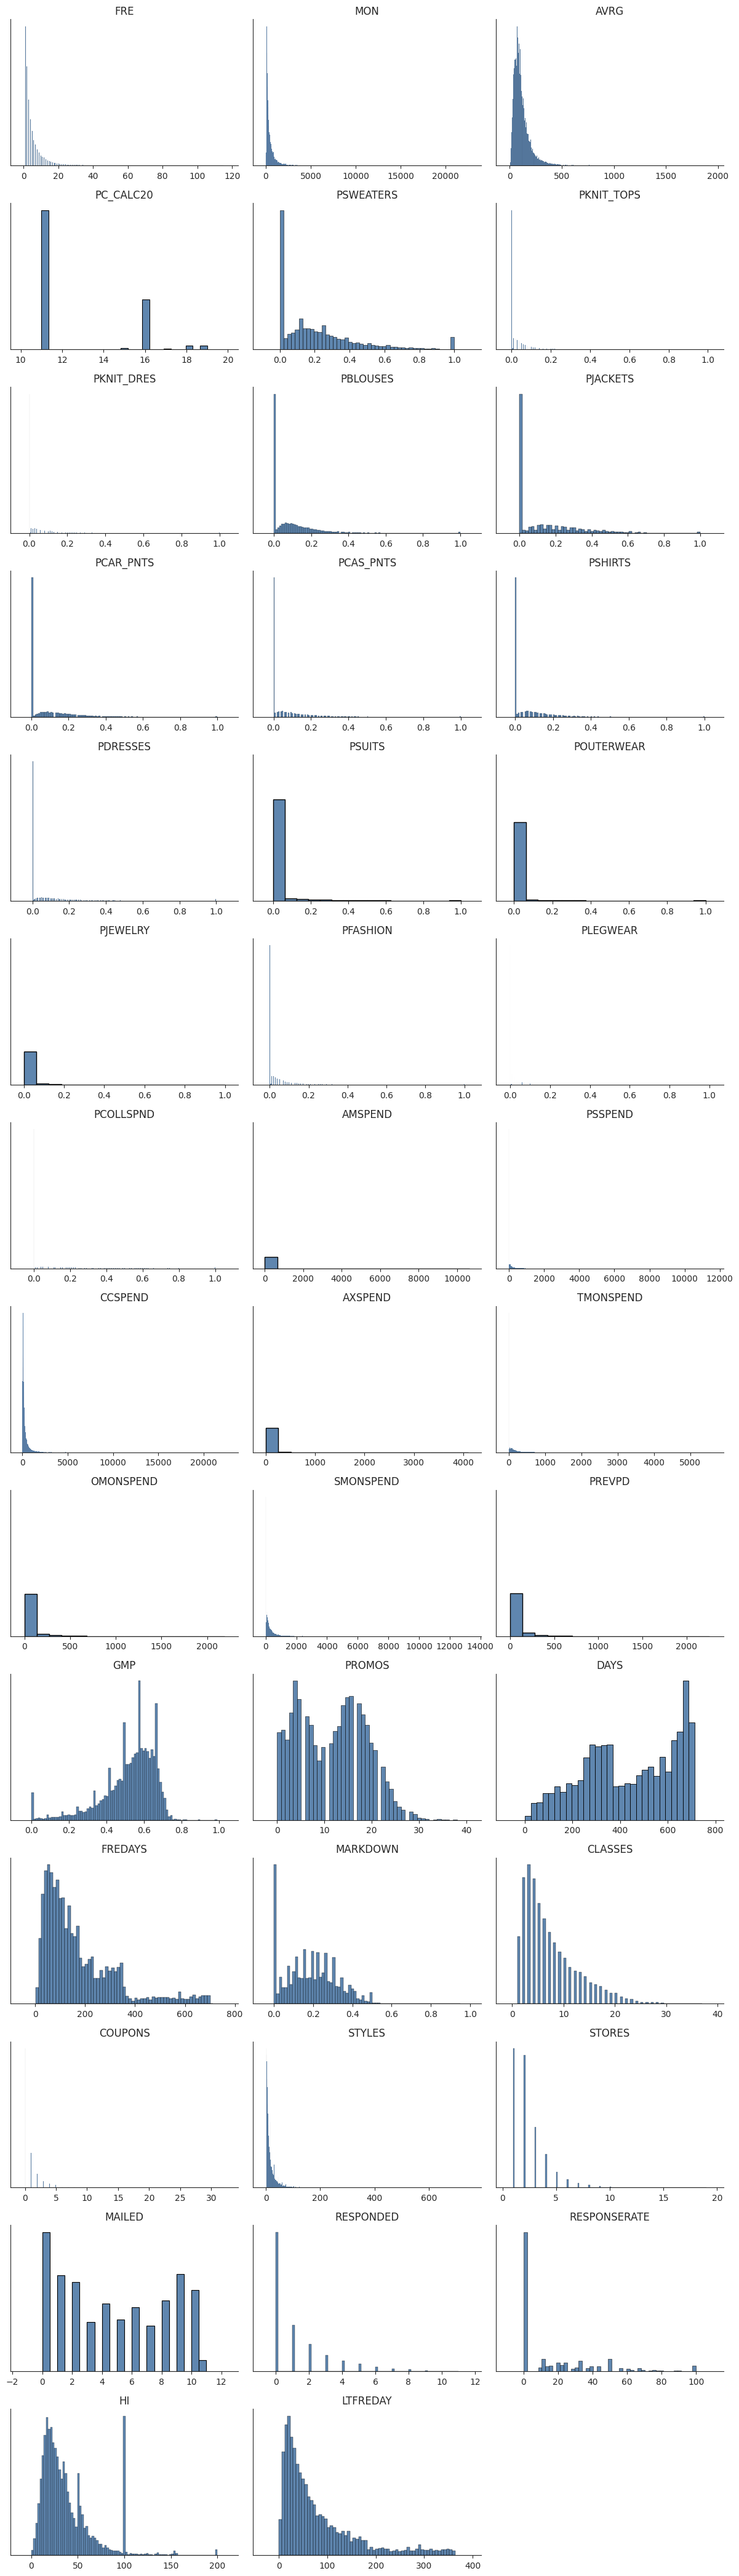

In [17]:
from tutorial4 import distplots

distplots(store[numerical])
plt.show()

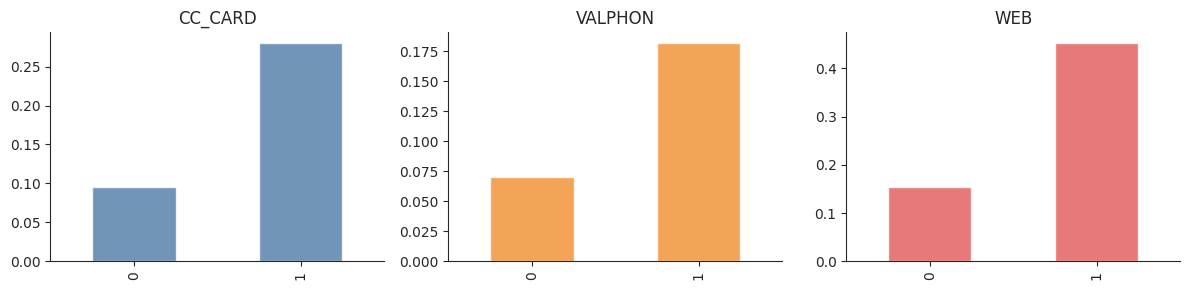

In [18]:
from tutorial4 import crosstabplots

crosstabplots(store[binary], store['RESP'])
plt.show()

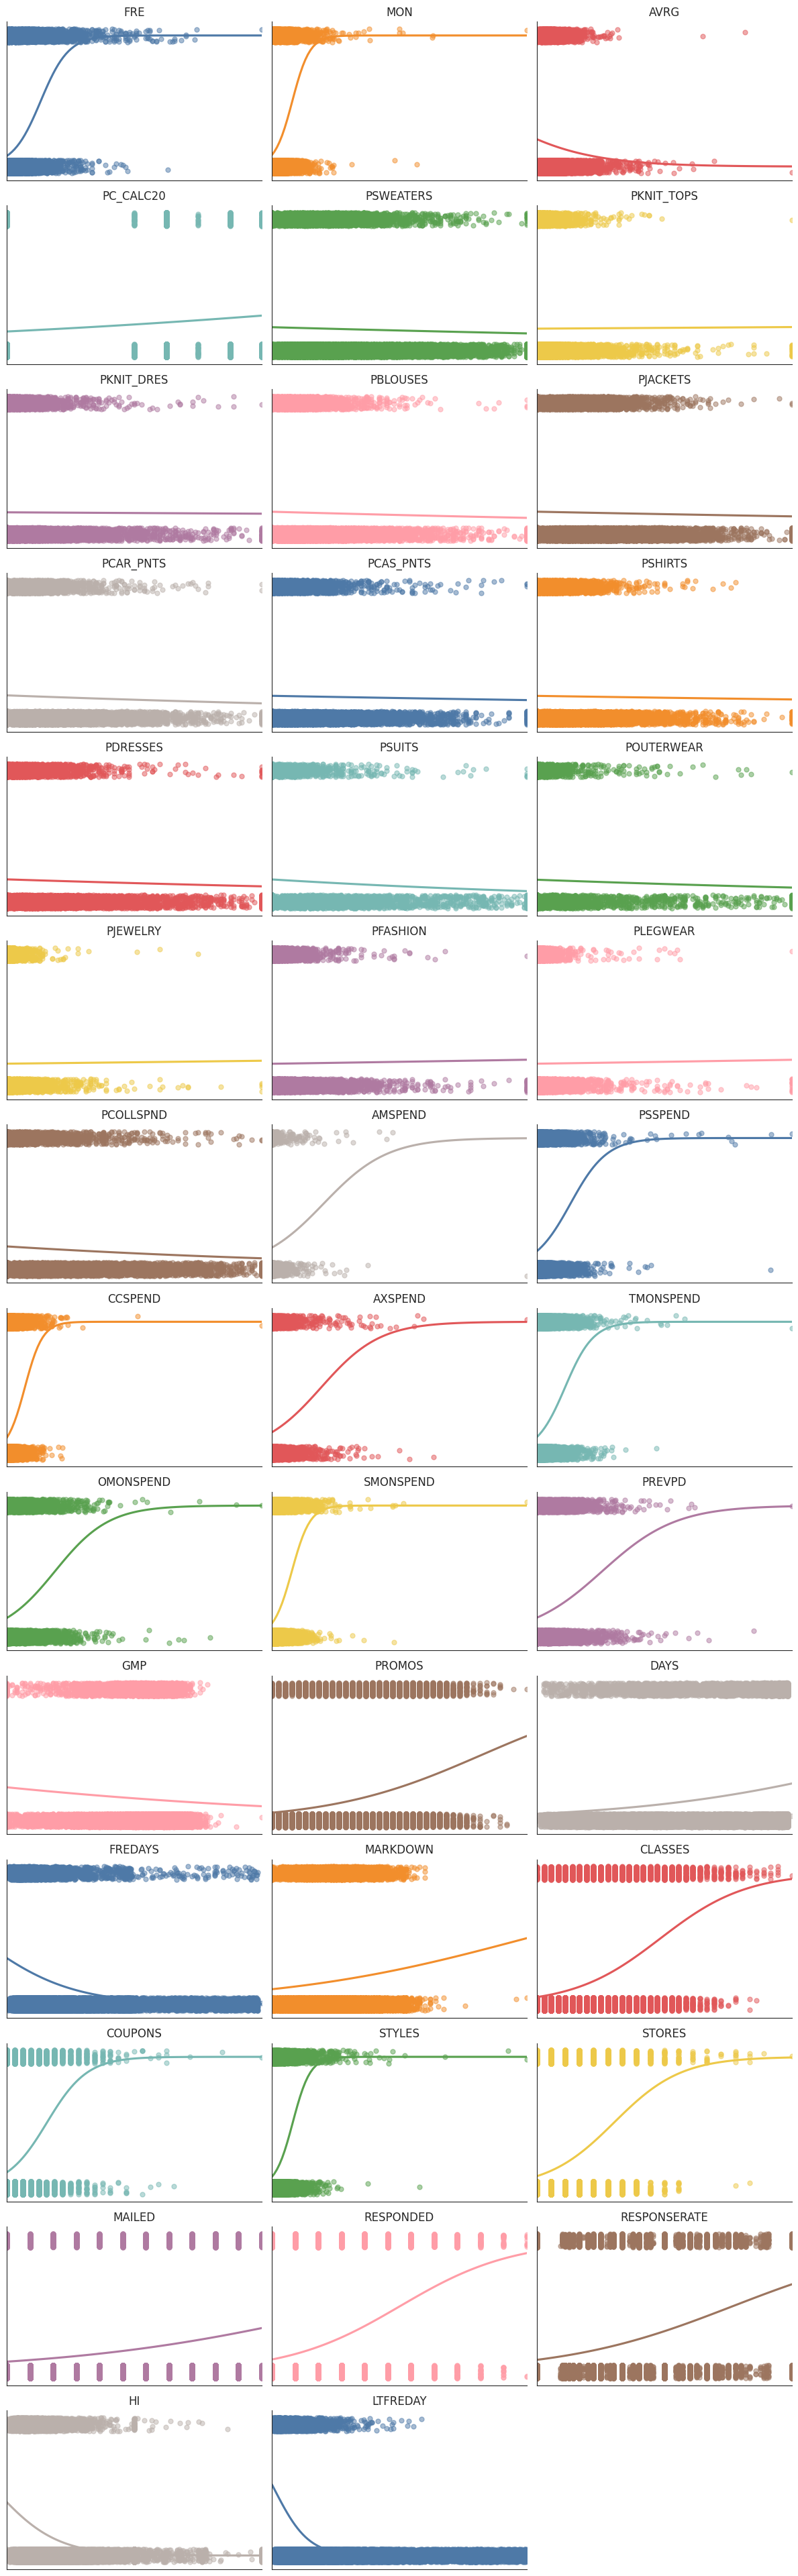

In [19]:
from tutorial4 import regplots

fig, ax = regplots(store[numerical], store['RESP'])
plt.show()

In [20]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(store[numerical],store['RESP'],random_state=1)
results1 = pd.DataFrame(mi, index = numerical, columns=['MI'])
results1.sort_values('MI', ascending = False)

,MI
LTFREDAY,0.105131
FRE,0.080832
STYLES,0.070334
FREDAYS,0.064752
CLASSES,0.061497
RESPONDED,0.056213
MON,0.054915
SMONSPEND,0.052870
RESPONSERATE,0.052725
HI,0.045634


In [21]:
from sklearn.preprocessing import OrdinalEncoder
features = OrdinalEncoder().fit_transform(store[binary])

mi = mutual_info_classif(features, store['RESP'], n_neighbors=5,
                         random_state=1, discrete_features=True)

results2 = pd.DataFrame(mi, index = binary, columns=['MI'])
results2.sort_values('MI', ascending = False)

,MI
CC_CARD,0.028327
WEB,0.009770
VALPHON,0.006483


In [22]:
results = pd.concat([results1, results2], axis=0).sort_values(by='MI', ascending=False).round(4)
results.round(4)

,MI
LTFREDAY,0.1051
FRE,0.0808
STYLES,0.0703
FREDAYS,0.0648
CLASSES,0.0615
RESPONDED,0.0562
MON,0.0549
SMONSPEND,0.0529
RESPONSERATE,0.0527
HI,0.0456


#Feature Engineering

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
standfeatures = numerical
scaler = StandardScaler().fit(store.loc[:, standfeatures])
store.loc[:,standfeatures] = scaler.transform(store.loc[:, standfeatures])

In [25]:
all_data = pd.concat((store[numerical+binary],store['RESP']),axis=1)
all_data.shape

(21740, 45)

In [26]:
index_tv, index_test = train_test_split(all_data.index, train_size=0.8, random_state=10, shuffle=True)
tv = all_data.loc[index_tv, :].copy()
test = all_data.loc[index_test, :].copy()

index_train, index_valid = train_test_split(tv.index, train_size=0.8, random_state=10, shuffle=True)
train = all_data.loc[index_train, :].copy()
valid = all_data.loc[index_valid, :].copy()

In [27]:
predictors = all_data.columns.to_list()

In [28]:
predictors.remove('RESP')

In [29]:
X_train = train.loc[:,predictors].to_numpy()
X_valid = valid.loc[:,predictors].to_numpy()
X_test = test.loc[:,predictors].to_numpy()

y_train = train.loc[:,'RESP'].to_numpy()
y_valid = valid.loc[:,'RESP'].to_numpy()
y_test = test.loc[:,'RESP'].to_numpy()

#Linear Model

*   Logistic
*   LDA
*   QDA
*   KNN

In [30]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(penalty = None)
logit.fit(X_train, y_train)

LogisticRegression(penalty=None)

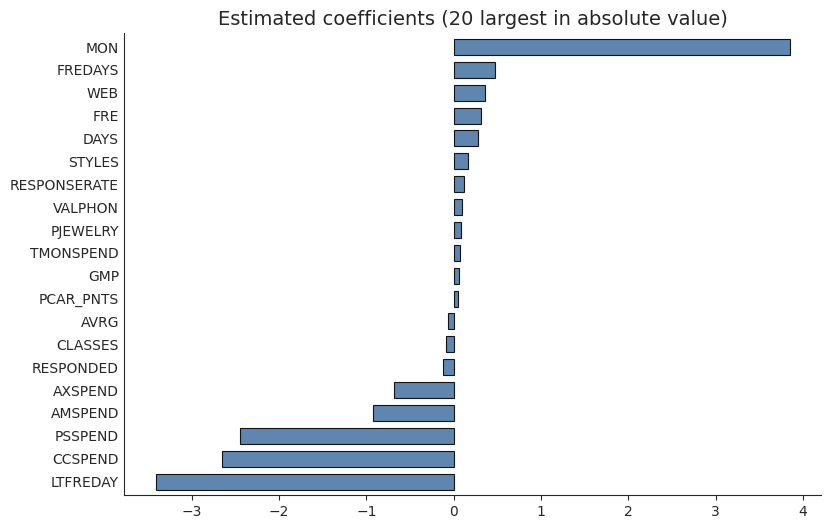

In [31]:
from tutorial4 import coefplot
coefplot(logit, predictors)
plt.show()

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

qda = QuadraticDiscriminantAnalysis(reg_param = 0.5)
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(reg_param=0.5)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

##Logistic Regression With Regularization


*   l1
*   l2

In [34]:
from sklearn.linear_model import LogisticRegressionCV
logit_l1= LogisticRegressionCV(penalty='l1', solver='liblinear', scoring='neg_log_loss', random_state = 10)
logit_l1.fit(X_train, y_train)

LogisticRegressionCV(penalty='l1', random_state=10, scoring='neg_log_loss',
                     solver='liblinear')

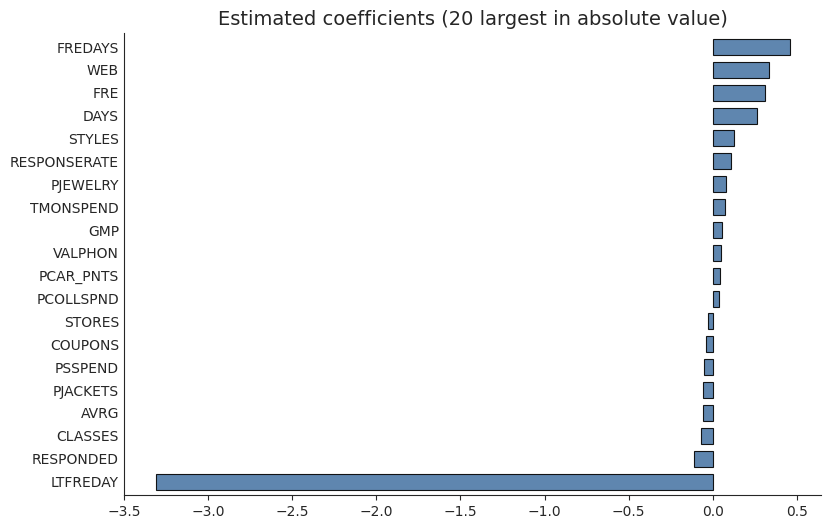

In [35]:
coefplot(logit_l1, predictors)
plt.show()

In [36]:
logit_l2= LogisticRegressionCV(Cs = 50, penalty='l2', solver='lbfgs', scoring='neg_log_loss', random_state = 10)
logit_l2.fit(X_train, y_train)

LogisticRegressionCV(Cs=50, random_state=10, scoring='neg_log_loss')

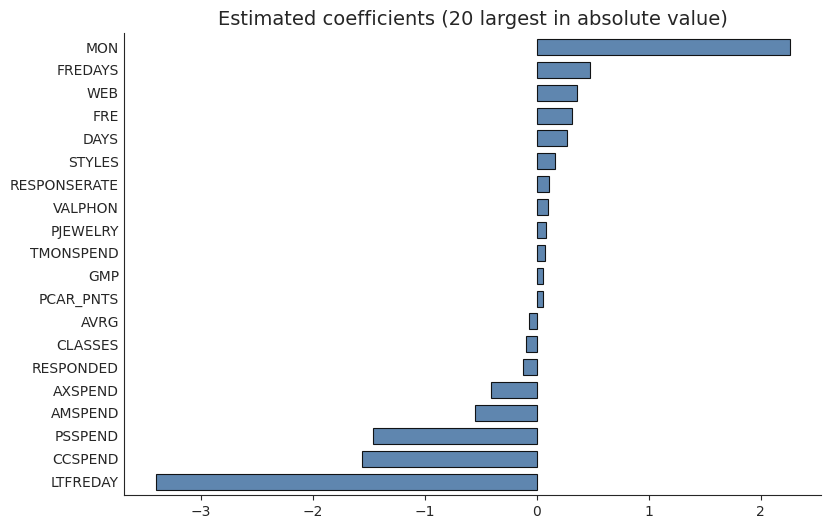

In [37]:
coefplot(logit_l2, predictors)
plt.show()

#Tree-based Model


#Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = 6)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=6)

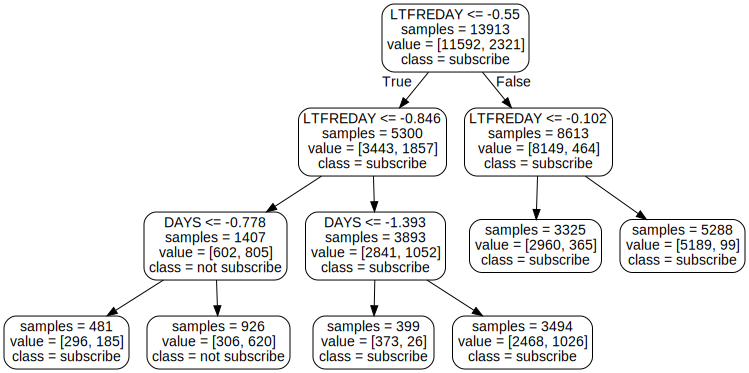

In [39]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, out_file=None , impurity=False, feature_names = predictors,
                           class_names=['subscribe','not subscribe'], rounded=True)
graph = graphviz.Source(dot_data)
graph

In [40]:
model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4)
path = model.cost_complexity_pruning_path(X_train, y_train)
alphas = path.ccp_alphas

search_space = {
    'ccp_alpha': alphas,
}

tree_search = RandomizedSearchCV(model, search_space, cv = 5 , scoring='neg_log_loss', random_state=10)
tree_search.fit(X_train, y_train)
tree = tree_search.best_estimator_

print('Best parameters found by random search:', tree_search.best_params_, '\n')

Best parameters found by random search: {'ccp_alpha': 0.0004653913703702936} 



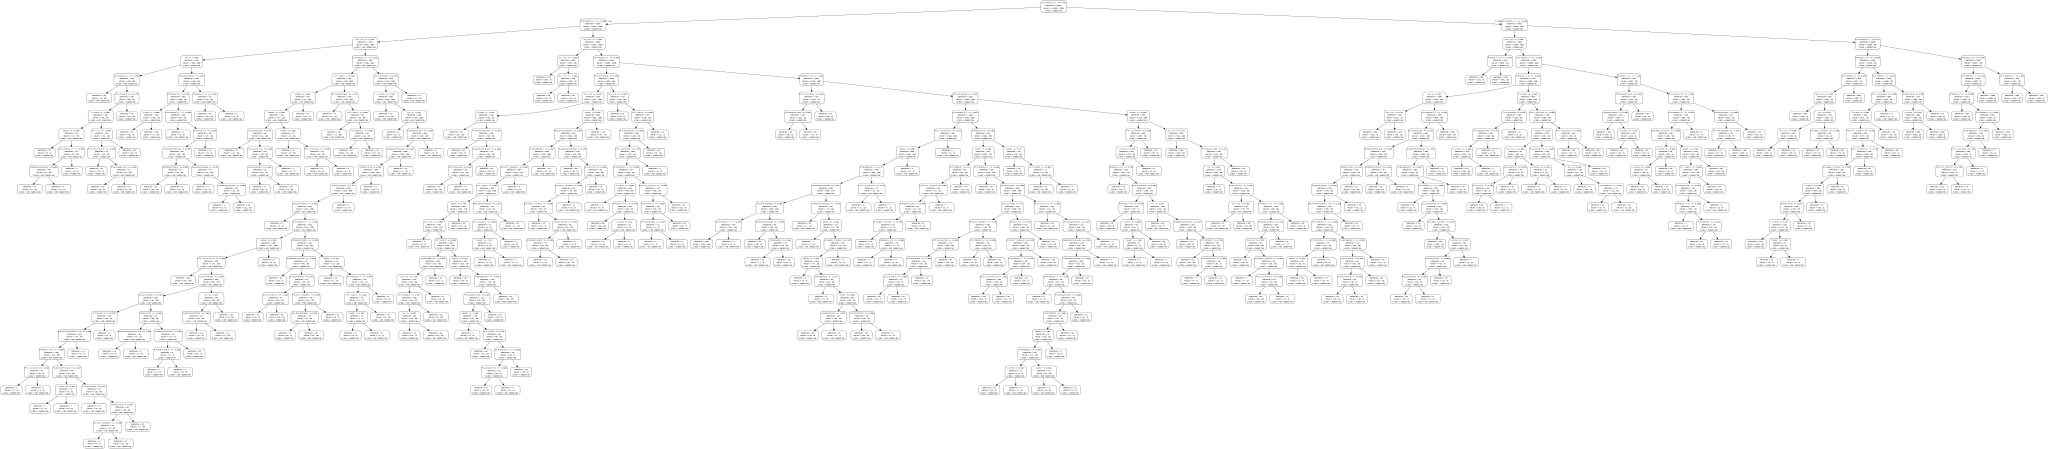

In [41]:
dot_data = export_graphviz(tree, out_file=None , impurity=False, feature_names = predictors,
                           class_names=['subscribe','not subscribe'], rounded=True)
graph = graphviz.Source(dot_data)
graph.render('tree02')
graph

#Bagging

In [42]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'), n_estimators=1000, random_state=10)
bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy'),
                  n_estimators=1000, random_state=10)

#Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier(n_estimators=1000,  criterion='entropy',
                max_features = 8, min_samples_leaf = 5, random_state=10)

In [44]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=8, min_samples_leaf=5,
                       n_estimators=1000, random_state=10)

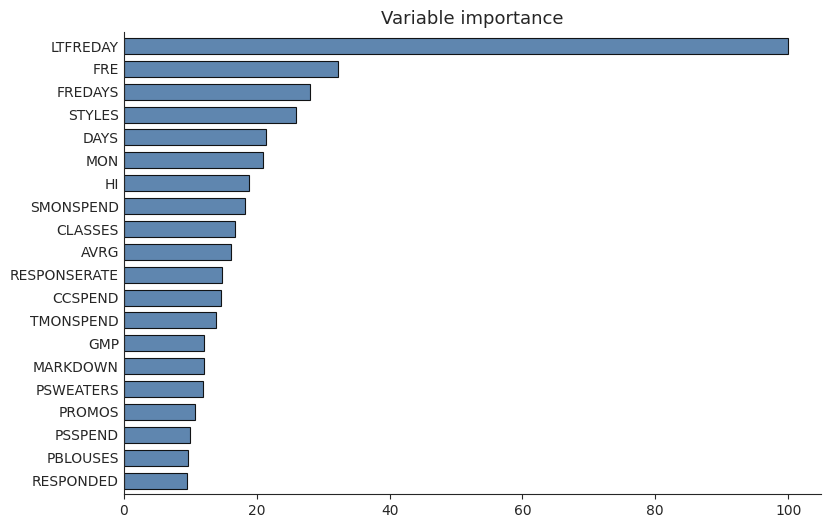

In [45]:
from tutorial9 import plot_feature_importance

plot_feature_importance(rf, predictors)
plt.show()
#higher = more important

In [46]:
import optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import cross_val_score

def objective(trial):

    criterion = trial.suggest_categorical('criterion', ['entropy', 'gini'])
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_int('max_features', 1, 20)


    model = RandomForestClassifier(n_estimators = 1000,
                                  criterion = criterion,
                                  max_features = max_features,
                                  min_samples_leaf= min_samples_leaf,
                                  random_state = 10)

    scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')
    loss = 1 - np.mean(scores)

    return loss

sampler = TPESampler(seed=42)
study = optuna.create_study(direction='minimize', sampler=sampler)
study.optimize(objective, n_trials = 100, timeout = 60)

[I 2024-05-15 12:34:02,948] A new study created in memory with name: no-name-47233cf0-8674-4383-8e1c-0885725defe4
[I 2024-05-15 12:38:02,860] Trial 0 finished with value: 0.1456915291129025 and parameters: {'criterion': 'gini', 'min_samples_leaf': 15, 'max_features': 12}. Best is trial 0 with value: 0.1456915291129025.


In [47]:
paras = study.best_params
paras

{'criterion': 'gini', 'min_samples_leaf': 15, 'max_features': 12}

In [48]:
rf = RandomForestClassifier(n_estimators=1000, **paras, random_state = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=12, min_samples_leaf=15, n_estimators=1000,
                       random_state=10)

#Boosting

#Gradient Boosting

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 8, n_estimators= 1901, subsample = 0.596, random_state = 10)
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=8, n_estimators=1901,
                           random_state=10, subsample=0.596)

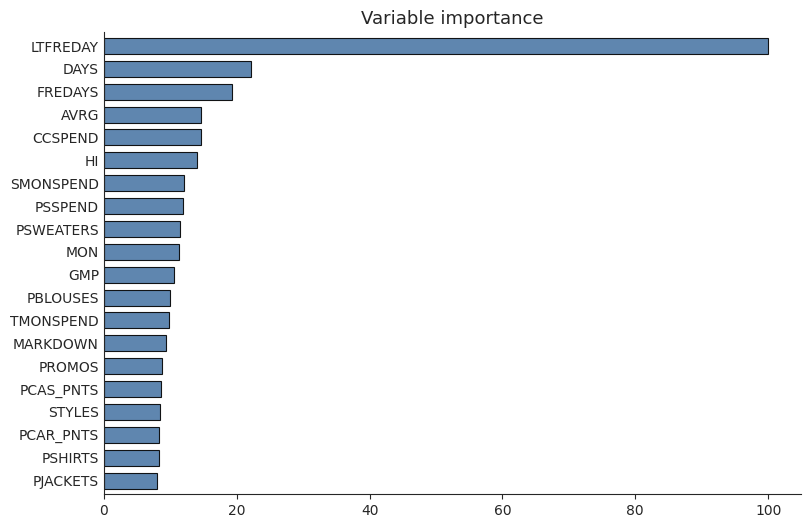

In [50]:
plot_feature_importance(gb, predictors)
plt.show()

#XGBoost

In [51]:
import xgboost as xgb

xgbst = xgb.XGBClassifier(booster = 'gbtree', learning_rate = 0.02,
              max_depth = 6, n_estimators = 2000, subsample = 0.60,  reg_lambda=0.0,
              reg_alpha = 0.0, colsample_bytree = 1.0, min_child_weight = 1.0)

xgbst.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1.0, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

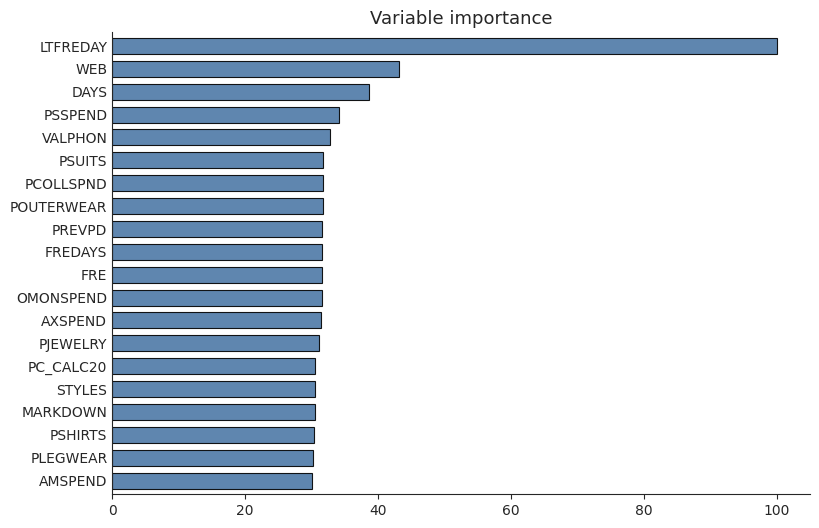

In [52]:
plot_feature_importance(xgbst, labels=predictors)
plt.show()

#LightGBM

In [53]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(boosting_type = 'gbdt',
              n_estimators = 2000, learning_rate = 0.01,
              num_leaves = 24,
              lambda_l1 = 0.0, lambda_l2 = 0.0,
              bagging_fraction = 0.74, bagging_freq = 1,
              feature_fraction = 1.0, min_data_in_leaf = 1)

lgbm = lgbm.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] bagging_fraction is set=0.74, subsample=1.0 will be ignored. Current value: bagging_fraction=0.74
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Cur

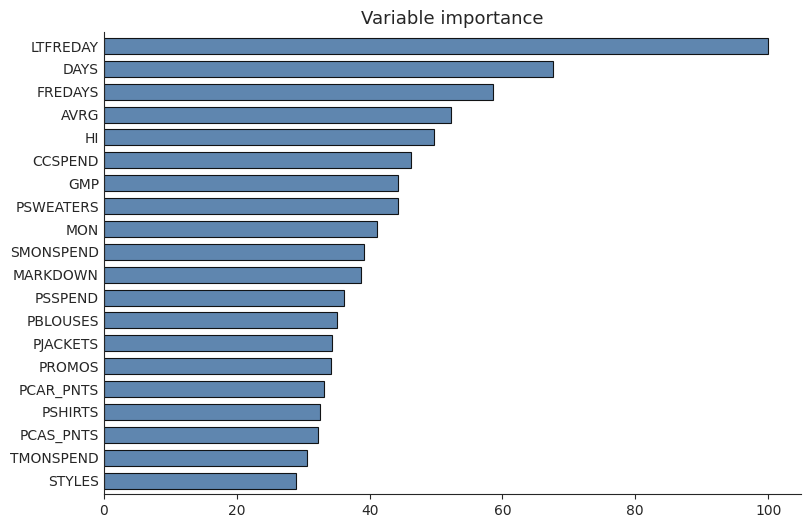

In [54]:
plot_feature_importance(lgbm, labels=predictors)
plt.show()

In [55]:
dtrain = lgb.Dataset(X_train, y_train)

In [56]:
import optuna.integration.lightgbm as lgb
params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'auc',
    'learning_rate': 0.05,
    'feature_pre_filter': False,
    'verbosity': -1,
    'random state': 10
}
tuner = lgb.LightGBMTunerCV(params, dtrain, num_boost_round = 5000, callbacks = [lgb.early_stopping(stopping_rounds = 50)],
                            time_budget = 120, nfold=5, stratified = False, seed = 10)
tuner.run()

[I 2024-05-15 12:44:16,870] A new study created in memory with name: no-name-2db1bcc8-7ce3-4a9d-9f67-6ff906c0060b
feature_fraction, val_score: -inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.848236:  14%|#4        | 1/7 [00:02<00:17,  2.99s/it]

Early stopping, best iteration is:
[76]	cv_agg's valid auc: 0.848236 + 0.00389062
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.848236:  29%|##8       | 2/7 [00:05<00:12,  2.53s/it]

Early stopping, best iteration is:
[54]	cv_agg's valid auc: 0.845679 + 0.00427837
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.848236:  43%|####2     | 3/7 [00:07<00:10,  2.50s/it]

Early stopping, best iteration is:
[48]	cv_agg's valid auc: 0.84718 + 0.00443
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.848336:  57%|#####7    | 4/7 [00:14<00:12,  4.20s/it]

Early stopping, best iteration is:
[66]	cv_agg's valid auc: 0.848336 + 0.00416195
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.848430:  71%|#######1  | 5/7 [00:17<00:07,  3.60s/it]

Early stopping, best iteration is:
[45]	cv_agg's valid auc: 0.84843 + 0.00359271
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.848430:  86%|########5 | 6/7 [00:19<00:03,  3.29s/it]

Early stopping, best iteration is:
[65]	cv_agg's valid auc: 0.847827 + 0.00401037
Training until validation scores don't improve for 50 rounds


feature_fraction, val_score: 0.848430: 100%|##########| 7/7 [00:22<00:00,  3.28s/it]


Early stopping, best iteration is:
[141]	cv_agg's valid auc: 0.84373 + 0.00513206


num_leaves, val_score: 0.848430:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.848430:   5%|5         | 1/20 [00:06<01:58,  6.23s/it]

Early stopping, best iteration is:
[43]	cv_agg's valid auc: 0.847235 + 0.00275238
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.848430:  10%|#         | 2/20 [00:18<02:54,  9.70s/it]

Early stopping, best iteration is:
[94]	cv_agg's valid auc: 0.841889 + 0.00372495
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.848430:  15%|#5        | 3/20 [00:25<02:26,  8.63s/it]

Early stopping, best iteration is:
[54]	cv_agg's valid auc: 0.841467 + 0.00227675
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.848430:  20%|##        | 4/20 [00:50<03:57, 14.82s/it]

Early stopping, best iteration is:
[126]	cv_agg's valid auc: 0.840007 + 0.00327309
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.850386:  25%|##5       | 5/20 [00:52<02:35, 10.39s/it]

Early stopping, best iteration is:
[97]	cv_agg's valid auc: 0.850386 + 0.00367142
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.850830:  30%|###       | 6/20 [01:02<02:23, 10.26s/it]

Early stopping, best iteration is:
[915]	cv_agg's valid auc: 0.85083 + 0.00378968
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.850830:  35%|###5      | 7/20 [01:08<01:56,  8.98s/it]

Early stopping, best iteration is:
[915]	cv_agg's valid auc: 0.85083 + 0.00378968
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.850830:  40%|####      | 8/20 [01:16<01:41,  8.43s/it]

Early stopping, best iteration is:
[277]	cv_agg's valid auc: 0.850374 + 0.00427942
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.850830:  45%|####5     | 9/20 [01:21<01:20,  7.33s/it]

Early stopping, best iteration is:
[54]	cv_agg's valid auc: 0.843653 + 0.0030805
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.850830:  50%|#####     | 10/20 [01:28<01:13,  7.32s/it]

Early stopping, best iteration is:
[45]	cv_agg's valid auc: 0.845214 + 0.003387
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.850830:  55%|#####5    | 11/20 [01:31<00:55,  6.13s/it]

Early stopping, best iteration is:
[42]	cv_agg's valid auc: 0.845725 + 0.00395065
Training until validation scores don't improve for 50 rounds


num_leaves, val_score: 0.850830:  60%|######    | 12/20 [01:43<01:09,  8.66s/it]


Early stopping, best iteration is:
[59]	cv_agg's valid auc: 0.839319 + 0.0026735


  0%|          | 0/5 [00:00<?, ?it/s]


In [57]:
print('Best params:')

tuner.best_params

Best params:


{'objective': 'binary',
 'boosting_type': 'gbdt',
 'metric': 'auc',
 'learning_rate': 0.05,
 'feature_pre_filter': False,
 'verbosity': -1,
 'random state': 10,
 'lambda_l1': 0.0,
 'lambda_l2': 0.0,
 'num_leaves': 2,
 'feature_fraction': 0.8999999999999999,
 'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'min_child_samples': 20}

In [58]:
import lightgbm as lgb
params = {'objective': 'binary',
      'boosting_type': 'gbdt',
      'metric': 'auc',
      'learning_rate': 0.05,
      'feature_pre_filter': False,
      'verbosity': -1,
      'random state': 10,
      'lambda_l1': 0.0,
      'lambda_l2': 0.0,
      'num_leaves': 3,
      'feature_fraction': 0.8999999999999999,
      'bagging_fraction': 1.0,
      'bagging_freq': 0,
      'min_child_samples': 20}

lgbm = lgb.LGBMClassifier(**params)
lgbm.fit(X_train, y_train)

LGBMClassifier(bagging_fraction=1.0, bagging_freq=0,
               feature_fraction=0.8999999999999999, feature_pre_filter=False,
               lambda_l1=0.0, lambda_l2=0.0, learning_rate=0.05, metric='auc',
               num_leaves=3, objective='binary', random state=10, verbosity=-1)

#CatBoost

In [59]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(loss_function='Logloss',
                       iterations = 2000, learning_rate = 0.01,
                       l2_leaf_reg = 0.0,
                       max_depth = 6,
                       subsample = 0.8,
                       verbose=0)

cb.fit(X_train, y_train)

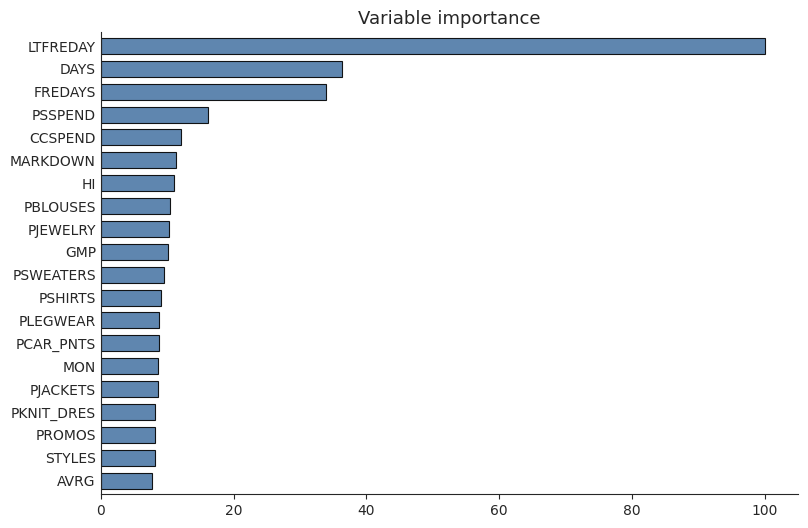

In [60]:
plot_feature_importance(cb, labels=predictors)
plt.show()

#Model Stacking

In [61]:
from sklearn.ensemble import StackingClassifier

estimators = [
        ('logistic_l2', LogisticRegressionCV(Cs = 50, penalty='l2', solver='lbfgs', scoring='neg_log_loss', random_state = 10)),
        ('bag', BaggingClassifier(DecisionTreeClassifier(criterion='entropy'), n_estimators=1000, random_state=10))]


stack = StackingClassifier(estimators=estimators, cv = 5, final_estimator=LogisticRegression(penalty= None))
stack.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('logistic_l2',
                                LogisticRegressionCV(Cs=50, random_state=10,
                                                     scoring='neg_log_loss')),
                               ('bag',
                                BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy'),
                                                  n_estimators=1000,
                                                  random_state=10))],
                   final_estimator=LogisticRegression(penalty=None))

#Validatioin Results

In [62]:
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, confusion_matrix, log_loss


columns=['Loss', 'Error Rate', 'Sensitivity', 'Specificity', 'Recall', 'Precision', 'F1-score', 'AUC', 'Cross-entropy']
rows=['Logistic', 'LDA', 'QDA', 'KNN', 'Logistic l1', 'Logistic l2', 'Classification Tree', 'Bagged trees', 'Random Forest','GBM',
   'XGBoost','LightGBM','CatBoost','Stack']
results=pd.DataFrame(0.0, columns=columns, index=rows)

methods=[logit, lda, qda, knn, logit_l1, logit_l2, clf, bag, rf, gb, xgbst, lgbm, cb, stack]

y_valid = np.ravel(y_valid)
y_prob = np.zeros((len(y_valid), len(rows)))

for i, method in enumerate(methods):

    y_prob[:,i] = method.predict_proba(X_valid)[:,1]
    y_pred = (y_prob[:,i] > tau).astype(int)

    loss =  2*((y_pred!=y_valid) & (y_pred==0)) + 1*((y_pred!=y_valid) & (y_pred==1))

    tn, fp, fn, tp = confusion_matrix(y_valid, y_pred).ravel()

    results.iloc[i,0] =  np.mean(loss) # or (fp*1+fn*2)/len(y_test)
    results.iloc[i,1] =  1 - accuracy_score(y_valid, y_pred)
    results.iloc[i,2] =  tp/(tp+fn)
    results.iloc[i,3] =  tn/(tn+fp)
    results.iloc[i,4] =  tp/(tp+fn)
    results.iloc[i,5] =  precision_score(y_valid, y_pred)
    results.iloc[i,6] =  2*(precision_score(y_valid, y_pred))*(tp/(tp+fn))/((precision_score(y_valid, y_pred))+(tp/(tp+fn)))
    results.iloc[i,7] =  roc_auc_score(y_valid, y_prob[:,i])
    results.iloc[i,8] =  log_loss(y_valid, y_prob[:,i])

results.round(4)

,Loss,Error Rate,Sensitivity,Specificity,Recall,Precision,F1-score,AUC,Cross-entropy
Logistic,0.2340,0.1607,0.5312,0.8964,0.5312,0.4874,0.5084,0.8433,0.3238
LDA,0.2527,0.1590,0.4007,0.9227,0.4007,0.4899,0.4408,0.8154,0.3503
QDA,0.2607,0.1883,0.5368,0.8627,0.5368,0.4201,0.4713,0.7840,1.1067
KNN,0.2754,0.1676,0.3107,0.9291,0.3107,0.4483,0.3670,0.7663,0.4589
Logistic l1,0.2346,0.1607,0.5276,0.8971,0.5276,0.4873,0.5066,0.8433,0.3236
Logistic l2,0.2334,0.1604,0.5331,0.8964,0.5331,0.4882,0.5097,0.8434,0.3237
Classification Tree,0.2458,0.1449,0.3548,0.9479,0.3548,0.5578,0.4337,0.8182,0.3349
Bagged trees,0.2368,0.1661,0.5478,0.8869,0.5478,0.4730,0.5077,0.8461,0.3216
Random Forest,0.2325,0.1555,0.5074,0.9070,0.5074,0.5027,0.5050,0.8460,0.3204
GBM,0.2426,0.1538,0.4320,0.9230,0.4320,0.5098,0.4677,0.8455,0.3382


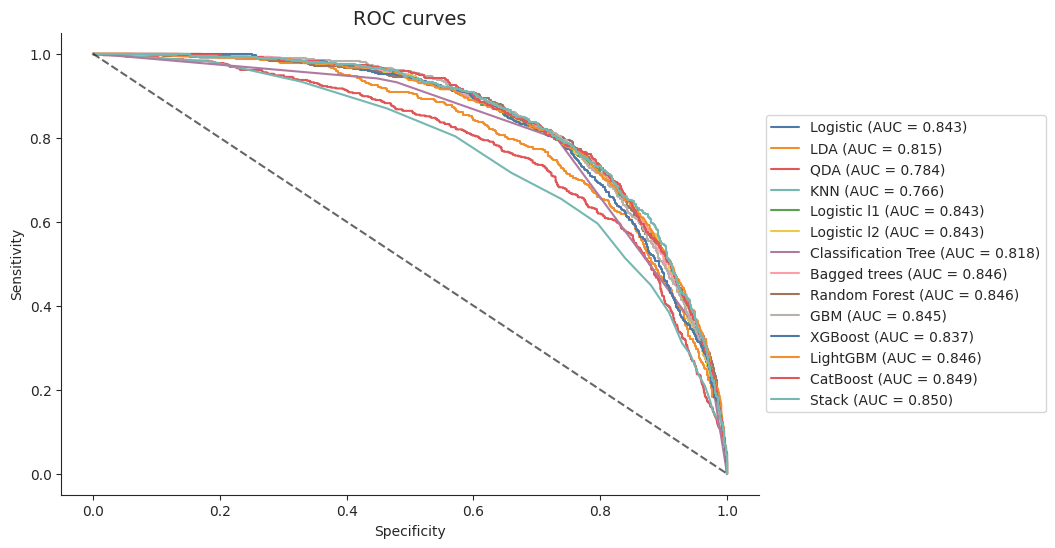

In [63]:
from tutorial9 import plot_roc_curves

fig, ax = plot_roc_curves(y_valid, y_prob, labels=pd.Series(rows))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#Model Valuation

In [64]:
X_tv = tv.loc[:,predictors].to_numpy()
y_tv = tv.loc[:,'RESP'].to_numpy()

In [65]:
X_tv.shape, y_tv.shape

((17392, 44), (17392,))

In [70]:
best_model = StackingClassifier(estimators=estimators, cv = 5, final_estimator=LogisticRegression(penalty= None))
best_model.fit(X_tv, y_tv)

StackingClassifier(cv=5,
                   estimators=[('logistic_l2',
                                LogisticRegressionCV(Cs=50, random_state=10,
                                                     scoring='neg_log_loss')),
                               ('bag',
                                BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy'),
                                                  n_estimators=1000,
                                                  random_state=10))],
                   final_estimator=LogisticRegression(penalty=None))

In [75]:
benchmark_model = LogisticRegressionCV(Cs = 50, penalty='l2', solver='lbfgs', scoring='neg_log_loss', random_state = 10)
benchmark_model.fit(X_tv, y_tv)

LogisticRegressionCV(Cs=50, random_state=10, scoring='neg_log_loss')

In [78]:
columns=['Loss', 'Error Rate', 'Sensitivity', 'Specificity', 'Recall', 'Precision', 'F1-score', 'AUC', 'Cross-entropy']
rows=['Logistic_l2','Stack']
results=pd.DataFrame(0.0, columns=columns, index=rows)

methods=[benchmark_model, best_model]

y_test = np.ravel(y_test)
y_prob = np.zeros((len(y_test), len(rows)))

for i, method in enumerate(methods):

    y_prob[:,i] = method.predict_proba(X_test)[:,1]
    y_pred = (y_prob[:,i] > tau).astype(int)

    loss =  2*((y_pred!=y_test) & (y_pred==0)) + 1*((y_pred!=y_test) & (y_pred==1))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    results.iloc[i,0] =  np.mean(loss) # or (fp*1+fn*2)/len(y_test)
    results.iloc[i,1] =  1 - accuracy_score(y_test, y_pred)
    results.iloc[i,2] =  tp/(tp+fn)
    results.iloc[i,3] =  tn/(tn+fp)
    results.iloc[i,4] =  tp/(tp+fn)
    results.iloc[i,5] =  precision_score(y_test, y_pred)
    results.iloc[i,6] =  2*(precision_score(y_test, y_pred))*(tp/(tp+fn))/((precision_score(y_test, y_pred))+(tp/(tp+fn)))
    results.iloc[i,7] =  roc_auc_score(y_test, y_prob[:,i])
    results.iloc[i,8] =  log_loss(y_test, y_prob[:,i])

results.round(4)

,Loss,Error Rate,Sensitivity,Specificity,Recall,Precision,F1-score,AUC,Cross-entropy
Logistic_l2,0.2426,0.1587,0.5107,0.9098,0.5107,0.5397,0.5248,0.8437,0.3374
Stack,0.2392,0.1500,0.4799,0.9267,0.4799,0.5756,0.5234,0.8474,0.3410


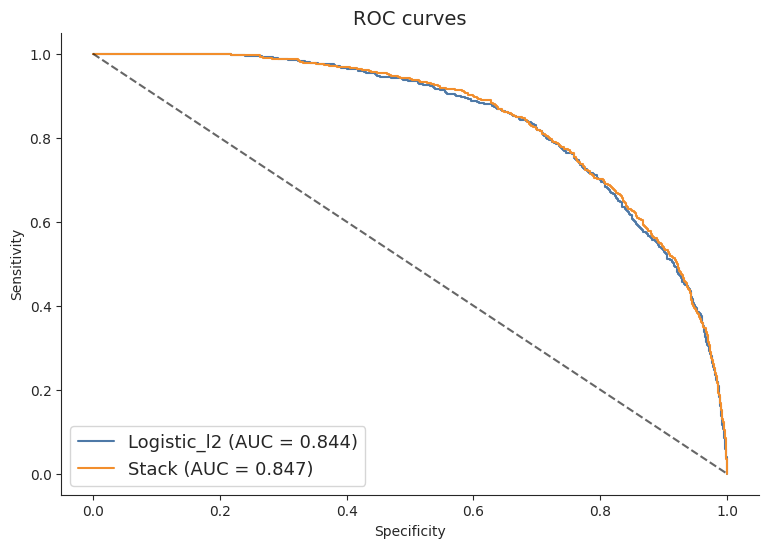

In [79]:
from tutorial9 import plot_roc_curves

fig, ax = plot_roc_curves(y_test, y_prob, labels=pd.Series(rows))
plt.show()